In [52]:
import pandas as pd
from pandas_datareader.data import DataReader
from datetime import datetime
import matplotlib.pyplot as plt

In [53]:
tech_list=['AAPL', 'GOOG', 'MSFT', 'AMZN']
end= datetime.now()
start = datetime(end.year - 10, end.month, end.day)

for i in tech_list:
    
    globals()[i]=DataReader(i, 'yahoo', start, end) 

In [54]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df


,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2011-03-28,12.654286,12.515714,12.612500,12.515714,309355200.0,10.780579,APPLE
2011-03-29,12.534286,12.359286,12.416429,12.534286,352900800.0,10.796576,APPLE
2011-03-30,12.531429,12.408571,12.522857,12.451071,329406000.0,10.724896,APPLE
2011-03-31,12.492857,12.359286,12.370000,12.446786,274019200.0,10.721204,APPLE
2011-04-01,12.556786,12.260714,12.539643,12.305714,418661600.0,10.599690,APPLE
...,...,...,...,...,...,...,...
2021-03-19,3077.290039,3016.629883,3029.229980,3074.959961,4616400.0,3074.959961,AMAZON
2021-03-22,3126.580078,3060.050049,3067.850098,3110.870117,2902200.0,3110.870117,AMAZON
2021-03-23,3182.000000,3120.850098,3127.000000,3137.500000,3817300.0,3137.500000,AMAZON


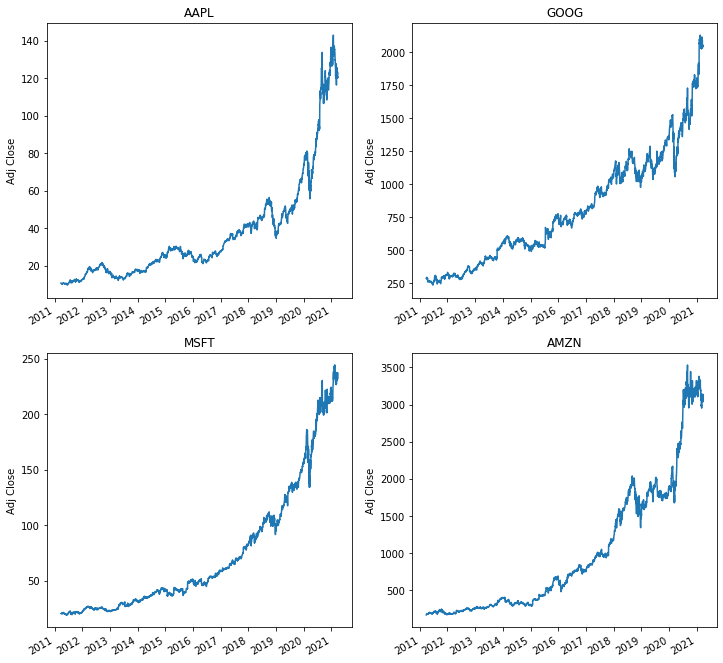

In [55]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

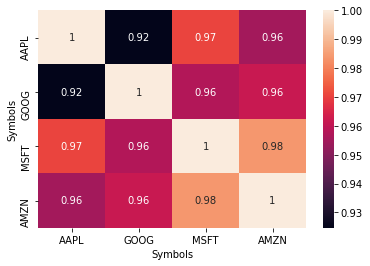

In [58]:
# correlation between ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
sns.heatmap(closing_data.corr(), annot=True)

### Apple Stock market prediction 

In [59]:
data=DataReader('AAPL','yahoo', start,end)

In [60]:
data=data[['Close']]
data

,Close
Date,
2011-03-28,12.515714
2011-03-29,12.534286
2011-03-30,12.451071
2011-03-31,12.446786
2011-04-01,12.305714
...,...
2021-03-19,119.989998
2021-03-22,123.389999
2021-03-23,122.540001


In [61]:
#split data to train and test
train_data=data[:'2017']['Close'].values
test_data=data['2018':]['Close'].values
print(len(train_data))
print(len(test_data))

1703
813


In [62]:
train_data[1]

12.534285545349121

In [63]:
train_data[1::1]

array([12.53428555, 12.45107079, 12.44678593, ..., 42.65000153,
       42.77000046, 42.30749893])

In [64]:
train_data.shape, test_data.shape

((1703,), (813,))

In [65]:
train_data=train_data.reshape(len(train_data),1)  
test_data=test_data.reshape(len(test_data),1)

In [66]:
train_data.shape, test_data.shape

((1703, 1), (813, 1))

In [67]:
from sklearn.preprocessing import MinMaxScaler

# scale train data
scale_data=MinMaxScaler()

train_scaled=scale_data.fit_transform(train_data)

# scale test data
test_scaled=scale_data.fit_transform(test_data)
len(train_scaled), len(test_scaled)

(1703, 813)

In [68]:
# split the train_data and test_data into( train_x, train_y, test_x, test_y)
train_x=[]
train_y=[]
test_x=[]
test_y=[]

for i in range(60,len(train_scaled)):
    train_x.append(train_scaled[i-30:i,0])
    train_y.append(train_scaled[i,0])
    
for j in range(60, len(test_scaled)):
    test_x.append(test_scaled[j-30:j,0])
    test_y.append(test_scaled[j,0])
    

In [69]:
# convert train_x, train_y to arrays
train_x, train_y = np.array(train_x), np.array(train_y)

# convert test_x, test_y to arrays
test_x, test_y=np.array(test_x), np.array(test_y)

In [70]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((1643, 30), (1643,), (753, 30), (753,))

In [71]:
# reshape the train_x
train_x=train_x.reshape(train_x.shape[0],train_x.shape[1],1)

#reshape the test_x
test_x=test_x.reshape(test_x.shape[0], test_x.shape[1],1)

train_x.shape, test_x.shape

((1643, 30, 1), (753, 30, 1))

## Predication using LSTM Model

In [72]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM,GRU

# Built LSTM model
model=Sequential([
    LSTM(128,return_sequences=True, input_shape=(train_x.shape[1],1)),
    LSTM(64, return_sequences=False),
    Dense(1) 
])

model.compile(optimizer='adam', loss='mse')

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30, 128)           66560     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [74]:
# fit the model
ml=model.fit(train_x, train_y, epochs=5)

Epoch 1/5
52/52 [==============================] - 4s 23ms/step - loss: 0.0460
Epoch 2/5
52/52 [==============================] - 1s 21ms/step - loss: 7.9708e-04
Epoch 3/5
52/52 [==============================] - 1s 21ms/step - loss: 6.4248e-04
Epoch 4/5
52/52 [==============================] - 1s 21ms/step - loss: 6.1907e-04
Epoch 5/5
52/52 [==============================] - 1s 21ms/step - loss: 6.7765e-04


In [75]:
# prediction model
prediction=model.predict(test_x)

In [76]:
# Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((prediction - test_y) ** 2)))
rmse

0.38714112614367385

In [77]:
def plot_predictions(test,preds):
    plt.plot(preds,label='Predicted')
    plt.plot(test,label='Test')
    plt.legend()
    plt.show()

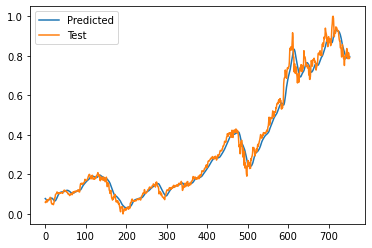

In [78]:
predicted_data = model.predict(test_x)
plot_predictions(test_y ,predicted_data.reshape(-1))

## Liner Reggresion

In [79]:
from sklearn.linear_model import LinearRegression 
def changeshape(x):
    return x.reshape(x.shape[0],x.shape[1])
lin_req=LinearRegression()
lin_req.fit(changeshape(train_x), train_y)

LinearRegression()

In [80]:
lin_req.score(changeshape(test_x), test_y)

0.9962928641303669

In [81]:
lin_req_prediction=lin_req.predict(changeshape(test_x))
lin_req_prediction

array([ 5.70708706e-02,  6.09020666e-02,  5.76745309e-02,  6.12486979e-02,
        6.92562438e-02,  7.08269913e-02,  6.25956387e-02,  6.61659841e-02,
        7.05837820e-02,  7.01707206e-02,  7.55646087e-02,  7.68224563e-02,
        7.75562878e-02,  8.47943162e-02,  8.27574911e-02,  7.03115829e-02,
        5.71229072e-02,  5.63972017e-02,  4.84325673e-02,  4.93670331e-02,
        5.29578153e-02,  4.87349406e-02,  5.39746545e-02,  6.46555607e-02,
        7.94029783e-02,  8.05954200e-02,  9.86057176e-02,  1.01314701e-01,
        1.01620263e-01,  1.04405934e-01,  1.12359487e-01,  1.07657056e-01,
        1.08142801e-01,  1.02608220e-01,  1.05897491e-01,  1.04729130e-01,
        1.03846715e-01,  1.07593130e-01,  1.05923657e-01,  1.08729732e-01,
        1.07852186e-01,  1.08625631e-01,  1.09273249e-01,  1.07063796e-01,
        1.03745405e-01,  1.12685797e-01,  1.15999183e-01,  1.18729631e-01,
        1.20278446e-01,  1.20059652e-01,  1.14626335e-01,  1.14133649e-01,
        1.16778461e-01,  

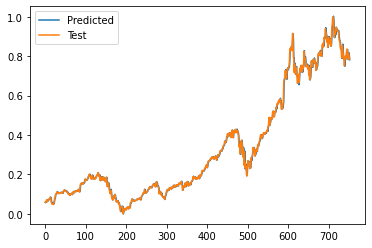

In [82]:
plot_predictions(test_y, lin_req_prediction)